In [20]:
pip install pandas matplotlib

Note: you may need to restart the kernel to use updated packages.


In [21]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [39]:



file_path = r'D:\DATA ANALYSIS Specialization\PROJECT\Demanda_d_energia_el_ctrica_hor_ria_a_Catalunya_per_MWh.csv'  # Replace with the path to your CSV file
data = pd.read_csv(file_path)

In [40]:
data.head(2)

,DATA,DIA,H01,H02,H03,H04,H05,H06,H07,H08,...,H17,H18,H19,H20,H21,H22,H23,H24,H25,TOTAL
0,27/04/2022,Dimecres,4131.285,3916.436,3788.778,3752.006,3756.597,3908.068,4390.084,4860.577,...,5199.937,5148.828,5113.614,5222.993,5435.652,5376.369,4862.408,4451.111,0.0,115778.397
1,28/04/2022,Dijous,4165.001,3973.996,3848.645,3807.207,3827.081,3979.739,4461.048,4922.929,...,5152.654,5132.720,5116.430,5235.663,5433.576,5378.489,4891.277,4458.333,0.0,116724.871


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7213 entries, 0 to 7212
Data columns (total 28 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATA    7213 non-null   object 
 1   DIA     7213 non-null   object 
 2   H01     7213 non-null   float64
 3   H02     7213 non-null   float64
 4   H03     7213 non-null   float64
 5   H04     7213 non-null   float64
 6   H05     7213 non-null   float64
 7   H06     7213 non-null   float64
 8   H07     7213 non-null   float64
 9   H08     7213 non-null   float64
 10  H09     7213 non-null   float64
 11  H10     7213 non-null   float64
 12  H11     7213 non-null   float64
 13  H12     7213 non-null   float64
 14  H13     7213 non-null   float64
 15  H14     7213 non-null   float64
 16  H15     7213 non-null   float64
 17  H16     7213 non-null   float64
 18  H17     7213 non-null   float64
 19  H18     7213 non-null   float64
 20  H19     7213 non-null   float64
 21  H20     7213 non-null   float64
 22  

In [26]:
data['DATA']= pd.to_datetime(data['DATA'], format= "%d/%m/%Y")



In [27]:
data=pd.melt(data,id_vars=['DATA'], value_vars=[f'H{str(i).zfill(2)}' for i in range (1, 25)])
data.head()

,DATA,variable,value
0,2022-04-27,H01,4131.285
1,2022-04-28,H01,4165.001
2,2022-04-29,H01,4222.306
3,2022-04-30,H01,4143.280
4,2022-06-16,H01,4831.410


In [28]:


file_path = r'D:\DATA ANALYSIS Specialization\PROJECT\csv files\Lumisa Energy Prices.csv' 
price = pd.read_csv(file_path)

In [29]:
price.head()

,SortedHour,HOUR,Price per KWH,Price per MWH
0,1,H01,0.14,135.2
1,2,H02,0.13,129.9
2,3,H03,0.12,116.6
3,4,H04,0.12,115.7
4,5,H05,0.12,116.7


In [30]:

merged_data = data.merge(price, how='inner', left_on='variable', right_on='HOUR')

merged_data['Price per Hour in MWH'] = merged_data['value'] * merged_data['Price per MWH']

merged_data


,DATA,variable,value,SortedHour,HOUR,Price per KWH,Price per MWH,Price per Hour in MWH
0,2022-04-27,H01,4131.285,1,H01,0.14,135.2,558549.7320
1,2022-04-28,H01,4165.001,1,H01,0.14,135.2,563108.1352
2,2022-04-29,H01,4222.306,1,H01,0.14,135.2,570855.7712
3,2022-04-30,H01,4143.280,1,H01,0.14,135.2,560171.4560
4,2022-06-16,H01,4831.410,1,H01,0.14,135.2,653206.6320
...,...,...,...,...,...,...,...,...
173107,2023-11-13,H24,4409.852,24,H24,0.14,142.7,629285.8804
173108,2023-11-14,H24,4358.690,24,H24,0.14,142.7,621985.0630
173109,2023-11-15,H24,4539.522,24,H24,0.14,142.7,647789.7894
173110,2023-11-16,H24,4475.010,24,H24,0.14,142.7,638583.9270


In [31]:
print(data.dtypes)
print(price.dtypes)
print(data.isnull().sum())
print(price.isnull().sum())


DATA        datetime64[ns]
variable            object
value              float64
dtype: object
SortedHour         int64
HOUR              object
Price per KWH    float64
Price per MWH    float64
dtype: object
DATA        0
variable    0
value       0
dtype: int64
SortedHour       0
HOUR             0
Price per KWH    0
Price per MWH    0
dtype: int64


In [32]:


# Rename a single column
merged_data = merged_data.rename(columns={'value': 'MWH'})


print(merged_data)

             DATA variable       MWH  SortedHour HOUR  Price per KWH  \
0      2022-04-27      H01  4131.285           1  H01           0.14   
1      2022-04-28      H01  4165.001           1  H01           0.14   
2      2022-04-29      H01  4222.306           1  H01           0.14   
3      2022-04-30      H01  4143.280           1  H01           0.14   
4      2022-06-16      H01  4831.410           1  H01           0.14   
...           ...      ...       ...         ...  ...            ...   
173107 2023-11-13      H24  4409.852          24  H24           0.14   
173108 2023-11-14      H24  4358.690          24  H24           0.14   
173109 2023-11-15      H24  4539.522          24  H24           0.14   
173110 2023-11-16      H24  4475.010          24  H24           0.14   
173111 2023-11-17      H24  4435.359          24  H24           0.14   

        Price per MWH  Price per Hour in MWH  
0               135.2            558549.7320  
1               135.2            563108.1

In [33]:
#pip install scipy


In [34]:
from scipy.stats import shapiro

numeric_columns = merged_data.select_dtypes(include=['number']).columns

alpha = 0.05  

for column in numeric_columns:
    print(f"Testing column: {column}")
    
    try:
        stat, p_value = shapiro(merged_data[column].dropna())
        print(f"Shapiro-Wilk Test for {column}: W-statistic = {stat}, p-value = {p_value}")
       
        if p_value > alpha:
            print(f"{column}: The data follows a normal distribution.")
        else:
            print(f"{column}: The data does not follow a normal distribution.")
    except Exception as e:
        print(f"Error testing column {column}: {e}")


Testing column: MWH
Shapiro-Wilk Test for MWH: W-statistic = 0.9777128076823437, p-value = 2.60526207960972e-84
MWH: The data does not follow a normal distribution.
Testing column: SortedHour
Shapiro-Wilk Test for SortedHour: W-statistic = 0.9509724407317126, p-value = 3.51993038426012e-104
SortedHour: The data does not follow a normal distribution.
Testing column: Price per KWH
Shapiro-Wilk Test for Price per KWH: W-statistic = 0.9217755046446222, p-value = 5.76834972830787e-117
Price per KWH: The data does not follow a normal distribution.
Testing column: Price per MWH
Shapiro-Wilk Test for Price per MWH: W-statistic = 0.9233737308023882, p-value = 2.19711738075917e-116
Price per MWH: The data does not follow a normal distribution.
Testing column: Price per Hour in MWH
Shapiro-Wilk Test for Price per Hour in MWH: W-statistic = 0.935060592184377, p-value = 8.806763205709675e-112
Price per Hour in MWH: The data does not follow a normal distribution.


c:\Users\Cecil Luna\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 173112.
  res = hypotest_fun_out(*samples, **kwds)


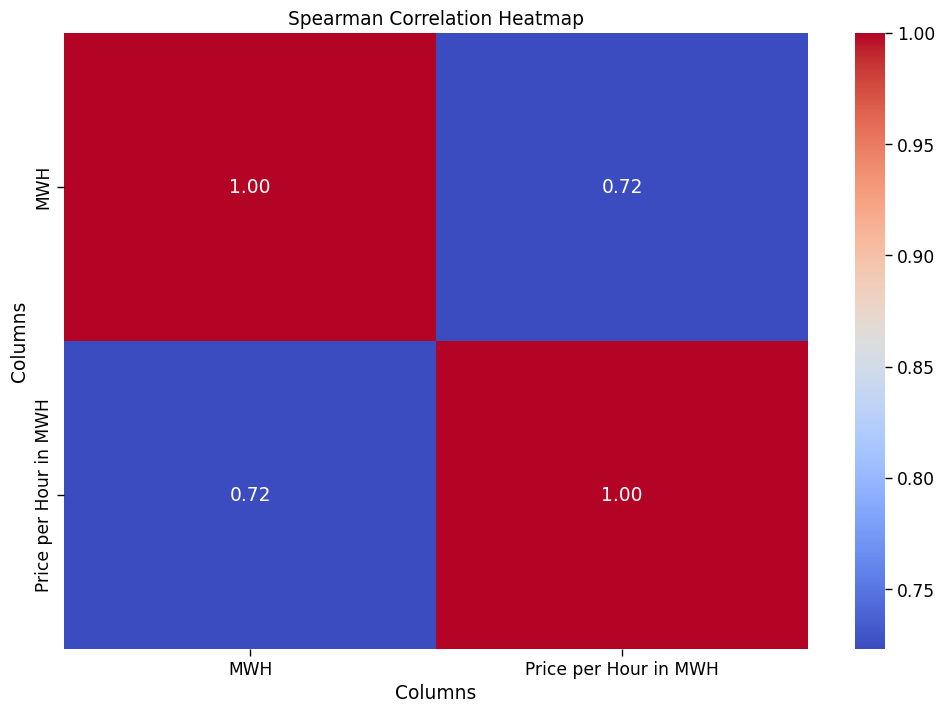

In [35]:

columns = ['MWH', 'Price per Hour in MWH']

data_subset = merged_data[columns]


correlation_matrix = data_subset.corr(method='spearman')


plt.figure(figsize=(12, 8))  
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)

# Add labels and title
plt.title('Spearman Correlation Heatmap')
plt.xlabel('Columns')
plt.ylabel('Columns')


plt.show()


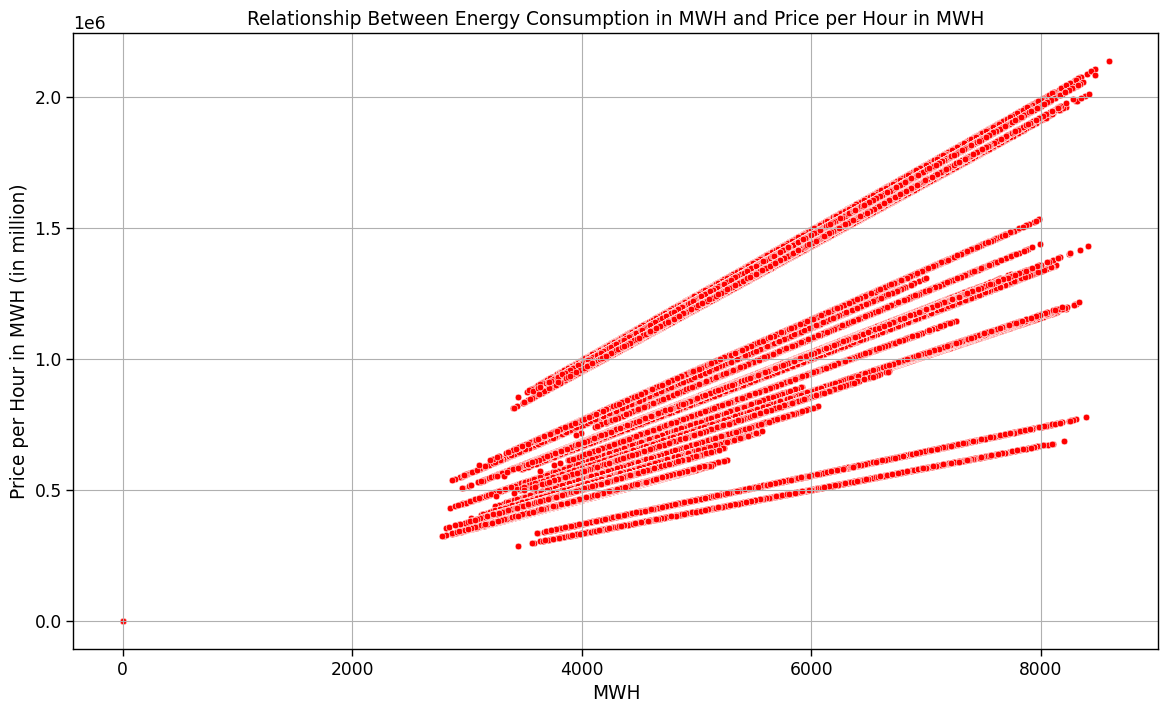

In [36]:

sns.set_context('paper', font_scale=1.4)


plt.figure(figsize=(14, 8))
sns.scatterplot(data=merged_data, x='MWH', y='Price per Hour in MWH', color='red')


plt.title('Relationship Between Energy Consumption in MWH and Price per Hour in MWH')
plt.xlabel('MWH')
plt.ylabel('Price per Hour in MWH (in million)')
plt.grid(True)  
plt.show()
